# Implementation of First-Visit MC Prediction on FrozenLake
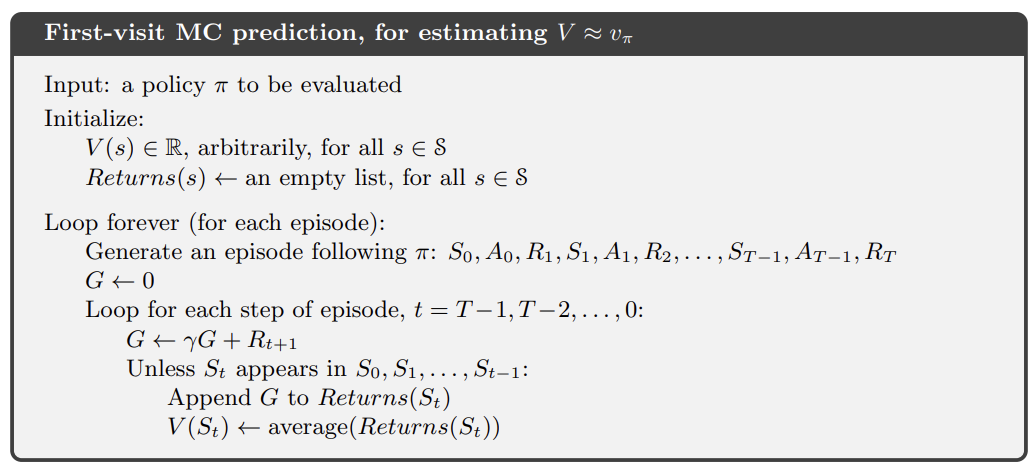

In [29]:
import gym
import numpy as np

# Parameters
env = gym.make("FrozenLake-v1", map_name="4x4", is_slippery=False, render_mode="human")
nS = env.observation_space.n 
nA = env.action_space.n 
gamma = 0.97
maxEpisodes = 10
inputPolicy = np.array([1, 2, 1, 0, 1, 0, 1, 0, 2, 1, 1, 0, 0, 2, 2, 0], dtype=int) # Optimal Policy

# Initialization
V = np.zeros([nS])
returns = [[] for _ in range(nS)]

# Looping Forever
for episode in range(maxEpisodes):
    initialState, _ = env.reset()
    done = False
    currentStepOfEpisode = 0
    trajectory = []
    # Generate an Episode
    while not done:
        action = inputPolicy[initialState]
        nextState, reward, done, _, _ = env.step(action)

        # If the agent is still on ice, then give penalty for not finding the treasure.
        if reward == 0:
            reward = -0.001
        
        # If the agent falls into the hole, give a large penalty
        if done and nextState != 15:
            reward = -1
        
        # If agent took too long, penalize
        if currentStepOfEpisode == 100:
            done = True
            reward = -1
        
        # Penalize if agent doesnt move
        if initialState == nextState:
            reward = -1
        trajectory.append([initialState, action, reward])
        initialState = nextState
        currentStepOfEpisode += 1
    
    # Loop through each step of the episode but in reverse
    trajectory.reverse()
    trajectoryStatesOnly = np.array([entry[0] for entry in trajectory])

    G = 0
    for step in range(len(trajectory)):
        G = gamma * G + trajectory[step][2]
        if trajectory[step][0] not in trajectoryStatesOnly[step+1:]:
            returns[trajectory[step][0]].append(G)
            V[trajectory[step][0]] = sum(returns[trajectory[step][0]]) / len(returns[trajectory[step][0]])

# Policy Visualization

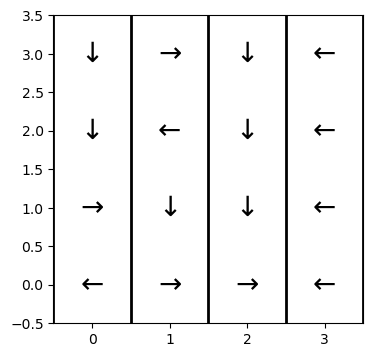

In [30]:
# Visualize the Policy
import matplotlib.pyplot as plt

def actionToArrow(action):
    if action == 0:
        return '←'
    elif action == 1:
        return '↓'
    elif action == 2:
        return '→'
    elif action == 3:
        return '↑'

nrow, ncol = 4, 4

fig, ax = plt.subplots(figsize=(ncol, nrow))
ax.set_xticks(np.arange(ncol+1)-0.5, minor=True)
ax.set_yticks(np.arange(nrow+1)-0.5, minor=True)
ax.grid(which="minor", color="black", linestyle='-', linewidth=2)
ax.tick_params(which="minor", size=0)
ax.set_xlim(-0.5, ncol-0.5)
ax.set_ylim(-0.5, nrow-0.5)
for i in range(nrow):
    for j in range(ncol):
        action = inputPolicy[i*ncol + j]
        arrow = actionToArrow(action)
        ax.text(j, nrow-1-i, arrow, ha='center', va='center', fontsize=20)
plt.show()
env.close()

([], [])

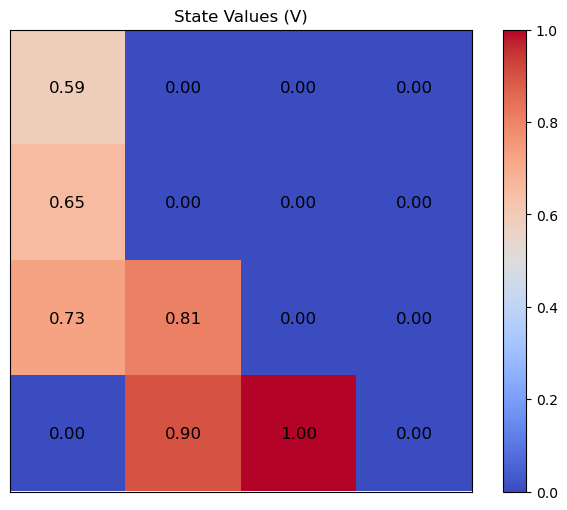

In [31]:
# Visualize State Values as a Heatmap
nrow, ncol = 4, 4  # Assuming a 4x4 grid for FrozenLake environment
values_grid = V.reshape((nrow, ncol))

plt.figure(figsize=(8, 6))
plt.imshow(values_grid, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('State Values (V)')
for i in range(nrow):
    for j in range(ncol):
        plt.text(j, i, f'{values_grid[i, j]:.2f}', ha='center', va='center', color='black', fontsize=12)
plt.xticks([])
plt.yticks([])